In [1]:
# Import the ``ansys.dpf.core`` module
import ansys.dpf.core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operators module
from ansys.dpf.core import operators as ops
# Import the geometry module
from ansys.dpf.core import geometry as geo

# Import the ``matplotlib.pyplot`` module
import matplotlib.pyplot as plt

# Download and get the path to an example result file
result_file_path_1 = examples.find_static_rst()

# Create a model from the result file
model_1 = dpf.Model(data_sources=result_file_path_1)

In [2]:
# Get the nodal displacement field at the last simulation step (default)
disp_results_1 = model_1.results.displacement.eval()

# Get the norm of the displacement field
norm_disp = ops.math.norm_fc(fields_container=disp_results_1).eval()

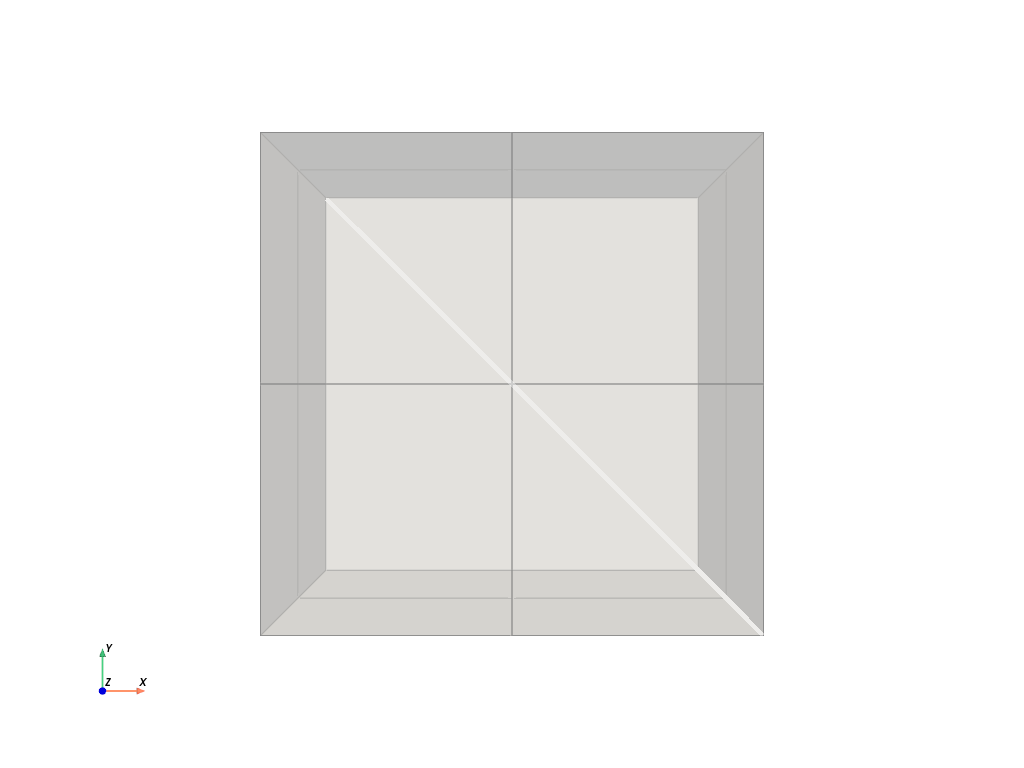

In [3]:
# Create a discretized line for the path
line_1 = geo.Line(coordinates=[[0.0, 0.06, 0.0], [0.03, 0.03, 0.03]], n_points=50)
# Plot the line on the original mesh
line_1.plot(mesh=model_1.metadata.meshed_region)

In [4]:
# Interpolate the displacement norm field at the nodes of the custom path
disp_norm_on_path_fc: dpf.FieldsContainer = ops.mapping.on_coordinates(
    fields_container=norm_disp,
    coordinates=line_1.mesh.nodes.coordinates_field,
).eval()
# Extract the only field in the collection obtained
disp_norm_on_path: dpf.Field = disp_norm_on_path_fc[0]
print(disp_norm_on_path)

DPF displacement_1.s Field
  Location: Nodal
  Unit: m
  50 entities 
  Data: 1 components and 50 elementary data 

  IDs                   data(m)
  ------------          ----------
  1                     1.481537e-08   
                        
  2                     1.451810e-08   
                        
  3                     1.421439e-08   
                        
  ...




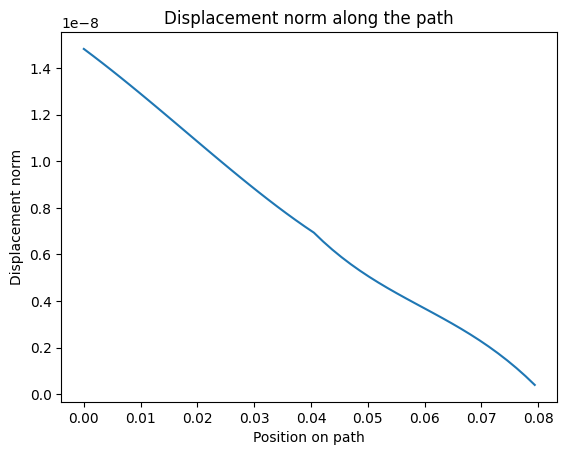

In [5]:
# Get the field of parametric coordinates along the path for the X-axis
line_coordinates = line_1.path

# Define the curve to plot
plt.plot(line_coordinates, disp_norm_on_path.data)

# Add titles to the axes and the graph
plt.xlabel("Position on path")
plt.ylabel("Displacement norm")
plt.title("Displacement norm along the path")

# Display the graph
plt.show()

In [6]:
# Import the ``ansys.dpf.core`` module
import ansys.dpf.core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operators module
from ansys.dpf.core import operators as ops

# Import the ``matplotlib.pyplot`` module
import matplotlib.pyplot as plt

# Download and get the path to an example transient result file
result_file_path_2 = examples.download_transient_result()

# Create a model from the result file
model_2 = dpf.Model(data_sources=result_file_path_2)

# Check the model is transient with its ``TimeFreqSupport``
print(model_2.metadata.time_freq_support)

DPF  Time/Freq Support: 
  Number of sets: 35 
Cumulative     Time (s)       LoadStep       Substep         
1              0.000000       1              1               
2              0.019975       1              2               
3              0.039975       1              3               
4              0.059975       1              4               
5              0.079975       1              5               
6              0.099975       1              6               
7              0.119975       1              7               
8              0.139975       1              8               
9              0.159975       1              9               
10             0.179975       1              10              
11             0.199975       1              11              
12             0.218975       1              12              
13             0.238975       1              13              
14             0.258975       1              14              
15             0.278975

In [7]:
# Get the displacement at all time steps
disp_results_2: dpf.FieldsContainer = model_2.results.displacement.on_all_time_freqs.eval()

In [8]:
# Instantiate the min_max operator and give the output of the norm operator as input
min_max_op = ops.min_max.min_max_fc(fields_container=ops.math.norm_fc(disp_results_2))

# Get the field of maximum values at each time-step
max_disp: dpf.Field = min_max_op.outputs.field_max()
print(max_disp)

# Get the field of minimum values at each time-step
min_disp: dpf.Field = min_max_op.outputs.field_min()
print(min_disp)

DPF displacement_0.s Field
  Location: Nodal
  Unit: m
  35 entities 
  Data: 1 components and 35 elementary data 

  IDs                   data(m)
  ------------          ----------
  0                     0.000000e+00   
                        
  1                     6.267373e-04   
                        
  2                     2.509401e-03   
                        
  ...


DPF displacement_0.s Field
  Location: Nodal
  Unit: m
  35 entities 
  Data: 1 components and 35 elementary data 

  IDs                   data(m)
  ------------          ----------
  0                     0.000000e+00   
                        
  1                     0.000000e+00   
                        
  2                     0.000000e+00   
                        
  ...




In [9]:
# Get the field of time values
time_steps_1: dpf.Field = disp_results_2.time_freq_support.time_frequencies

# Print the time values
print(time_steps_1)

DPF  Field
  Location: timefrq_sets
  Unit: s
  1 entities 
  Data: 1 components and 35 elementary data 

  TimeFreq_steps
  IDs                   data(s)
  ------------          ----------
  1                     0.000000e+00   
                        1.997500e-02   
                        3.997500e-02   
                        ...





In [10]:
# Get the time values
time_data = time_steps_1.data
print(time_data)

[0.         0.019975   0.039975   0.059975   0.079975   0.099975
 0.119975   0.139975   0.159975   0.179975   0.199975   0.218975
 0.238975   0.258975   0.278975   0.298975   0.318975   0.338975
 0.358975   0.378975   0.398975   0.417975   0.437975   0.457975
 0.477975   0.497975   0.517975   0.53754972 0.55725277 0.57711786
 0.59702054 0.61694639 0.63683347 0.65673452 0.67662783]


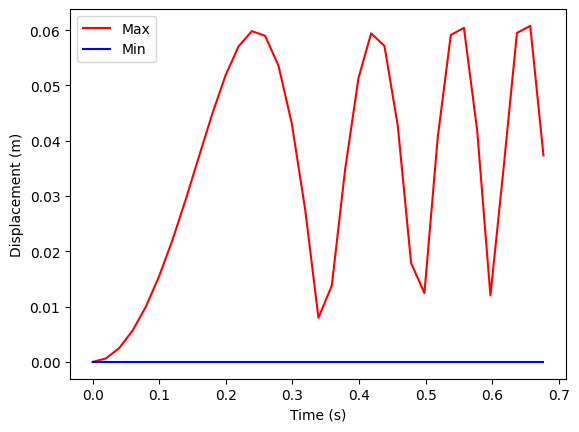

In [11]:
# Define the plot figure
plt.plot(time_data, max_disp.data, "r", label="Max")
plt.plot(time_data, min_disp.data, "b", label="Min")

# Add axis labels and legend
plt.xlabel(f"Time ({time_steps_1.unit})")
plt.ylabel(f"Displacement ({max_disp.unit})")
plt.legend()

# Display the graph
plt.show()